In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from svm_margin_plot import plot_svm_boundary

In [2]:
df = pd.read_csv('mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
print(df.empty)
bool(df.isnull().sum().any())

False


False

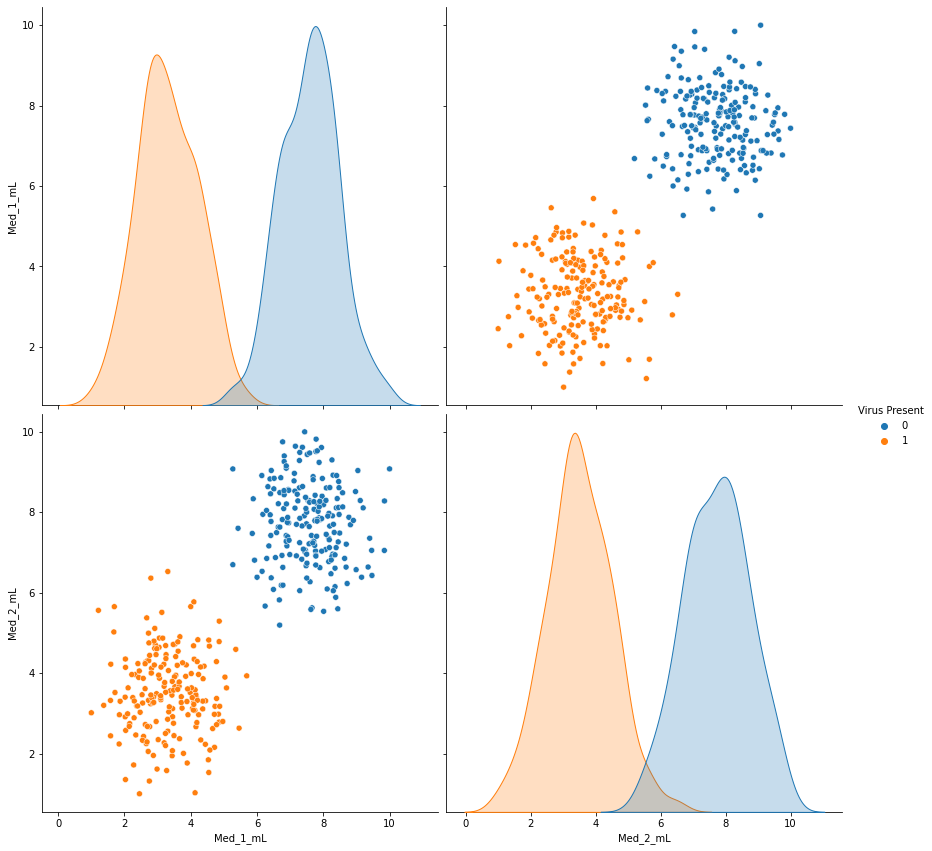

In [5]:
sns.pairplot(
    data=df,
    hue='Virus Present',
    height=6
);

In [7]:
X = df.drop('Virus Present', axis = 1)
y = df['Virus Present']

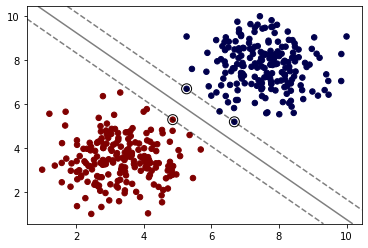

In [20]:
svc_model = SVC(
                C=1000,
                kernel='linear'
            ).fit(X, y)
plot_svm_boundary(svc_model, X, y)

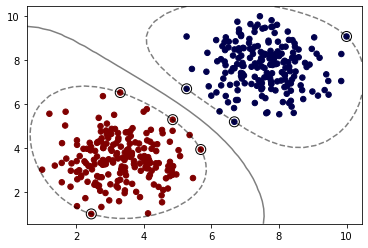

In [23]:
svc_model = SVC(
                C=1000,
                kernel='rbf'
            ).fit(X, y)
plot_svm_boundary(svc_model, X, y)

In [35]:
param_grid = {
    'C': np.logspace(-3, 2, 6),
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': np.arange(1, 7),
    'gamma': np.logspace(-3, 2, 6),  
}

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3028 tasks      | elapsed:    3.4s


1.0
{'C': 0.001, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}
SVC(C=0.001, degree=1, gamma=0.001, kernel='linear')


[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:    3.6s finished


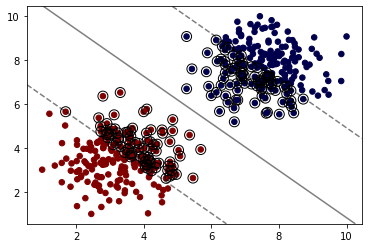

In [39]:
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X, y)
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
plot_svm_boundary(grid_search.best_estimator_, X, y)